In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [2]:
h = 10
x = y = np.array([h*i for i in range(64)])


In [3]:
das_template_x = np.array([2.5*np.sqrt(2)*i for i in range(23)])
das_template_y = np.array([2.5*np.sqrt(2)*i for i in range(23)])
das_template_x2 = np.hstack([das_template_x,das_template_x[::-1],das_template_x,das_template_x[::-1]])
das_template_y2 = np.hstack([das_template_y,das_template_y+das_template_y[-1],das_template_y+2*das_template_y[-1],das_template_y+3*das_template_y[-1]])

das_x = np.hstack([das_template_x2+i*das_template_x[-1] for i in range(4)])
das_y = np.hstack([das_template_y2 for i in range(4)])

offset = (320-np.max(das_x))/2

das_x += offset
das_y += offset

azimuth_template_1 = np.array([[[45 for i in range(23)], [-45 for i in range(23)]] for i in range(2)]).flatten()
azimuth_template_2 = np.array([[[135 for i in range(23)], [215 for i in range(23)]] for i in range(2)]).flatten()
das_az = np.hstack([azimuth_template_1, azimuth_template_2, 
                    azimuth_template_1, azimuth_template_2])

das_azr = np.deg2rad(das_az)

In [4]:
nx = ny = 32
t = np.linspace(0,320,nx+1)
s = np.linspace(0,320,17)

x = y = (t[:-1]+t[1:]) / 2
xst = yst = (s[:-1]+s[1:]) / 2

xs, ys = np.meshgrid(xst,yst)
xs = xs.flatten()
ys = ys.flatten()

# np.random.seed(43771120)
# xs = np.random.uniform(0,320,128)
# ys = np.random.uniform(0,320,128)

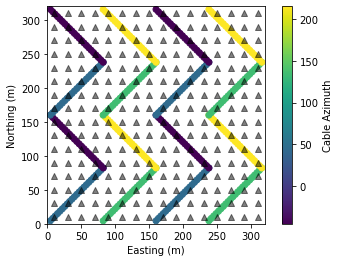

In [5]:
cax = plt.scatter(das_x, das_y,c=das_az)
plt.scatter(xs, ys, marker='^', color='k', alpha=0.5)
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Cable Azimuth")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/Setup.pdf")

In [6]:
from scipy.io import loadmat
from scipy.interpolate import RectBivariateSpline as rbs
from scipy.integrate import romb
import scipy.sparse as sp
import os

cscale = 2

generate_kernels = True

raz = np.deg2rad(das_az)

L = 5 #gauge length
ll = np.linspace(-L/2, L/2, 2**5+1)
dl = ll[1]-ll[0]
p1 = das_x[:,np.newaxis]+np.sin(raz[:,np.newaxis])*ll[np.newaxis,:]
p2 = das_y[:,np.newaxis]+np.cos(raz[:,np.newaxis])*ll[np.newaxis,:]


if generate_kernels:
    os.makedirs("Kernels", exist_ok=True)
    crv = loadmat(f"../Curvelet_Basis_Construction/G_{nx}_{ny}.mat")
    G_mat = np.reshape(crv["G_mat"].T, (crv["G_mat"].shape[1], nx, ny))
    crvscales = crv["scales"].flatten()
    cvtscaler = 2.0**(cscale*crvscales)
    G1 = np.zeros((len(raz), G_mat.shape[0]))
    G2 = np.zeros((len(raz), G_mat.shape[0]))
    G3 = np.zeros((len(xs), G_mat.shape[0]))             
    for j in range(G_mat.shape[0]):
        frame = rbs(x,y,G_mat[j])
        #average derivatives of frame along gauge length
        fd1 = romb(frame.ev(p1, p2, dx=1), dl) / L
        fd2 = romb(frame.ev(p1, p2, dy=1), dl) / L
        G1[:,j] = (np.sin(raz)**2*fd1 + 
                  np.sin(2*raz)*fd2/2) / cvtscaler[j]
        G2[:,j] = (np.cos(raz)**2*fd2 + 
                  np.sin(2*raz)*fd1/2) / cvtscaler[j]
        G3[:,j] = frame.ev(xs, ys) / cvtscaler[j]

    np.save("Kernels/G1.npy", G1)
    np.save("Kernels/G2.npy", G2)
    np.save("Kernels/G3.npy", G3)

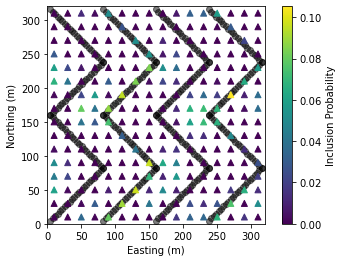

In [7]:
res = np.load("SpectralResults/res_spectral_4.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b4.pdf")

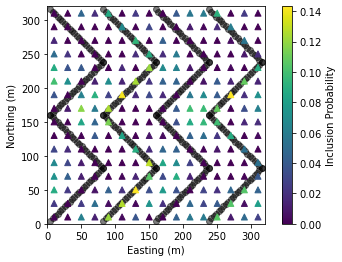

In [8]:
res = np.load("SpectralResults/res_spectral_8.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b8.pdf")

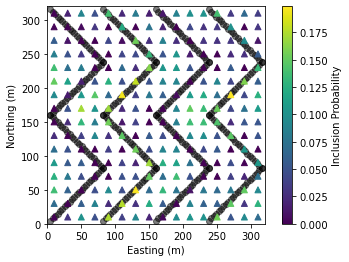

In [9]:
res = np.load("SpectralResults/res_spectral_16.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b16.pdf")

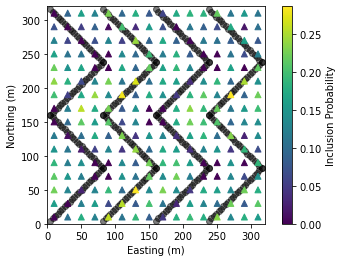

In [10]:
res = np.load("SpectralResults/res_spectral_32.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b32.pdf")

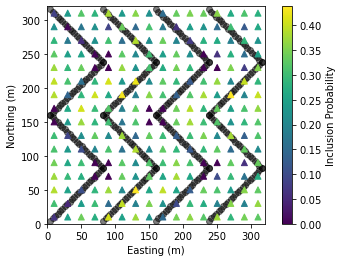

In [11]:
res = np.load("SpectralResults/res_spectral_64.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b64.pdf")

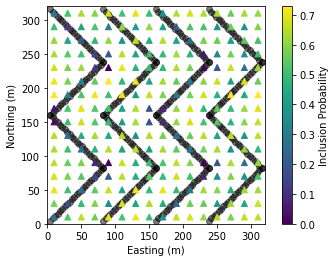

In [12]:
res = np.load("SpectralResults/res_spectral_128.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b128.pdf")

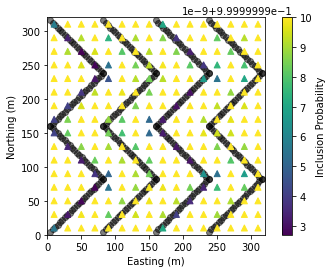

In [13]:
res = np.load("SpectralResults/res_spectral_256.npy")
plt.scatter(das_x, das_y, c='k', alpha=0.5)
cax = plt.scatter(xs, ys, c=res, marker='^')
plt.xlim(0,320)
plt.ylim(0,320)
plt.colorbar(cax, label="Inclusion Probability")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")
plt.savefig("Figures/b256.pdf")

In [14]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5, axis=0):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=axis)
    return y

def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, [low], btype='low')
    return b, a


def butter_low_filter(data, lowcut, fs, order=5, axis=0):
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = lfilter(b, a, data, axis=axis)
    return y

In [15]:
np.sqrt(2)*320 / 2000 * 8000 # = length of diagonal * approx samples to cross diagonal * assumed samples / s = m / s velocity

1810.1933598375617

In [16]:
shot = np.reshape(np.fromfile("Testing/TestData/shot1.dat", dtype=np.float32), (4001,64,64))
t = np.linspace(0, 0.5, 4001)
shotf = butter_low_filter(shot, 10, 8000)
tf = t[::20]
shotf = shotf[::20,:,:]
tf_freq = 1/(tf[1]-tf[0])

In [17]:
xc = np.linspace(0,320,65)
xc = (xc[:-1]+xc[1:])/2
yc = xc

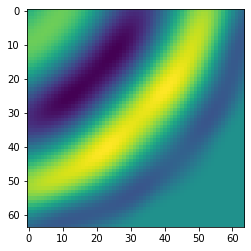

In [18]:
plt.imshow(shotf[101])

In [19]:
from scipy.interpolate import RectBivariateSpline as rbs

In [20]:
shotf_itps = [rbs(xc, yc, s) for s in shotf[:-1]]

In [21]:
exxr = np.array([romb(s.ev(p1, p2, dx=2), dl)/L for s in shotf_itps])
eyyr = np.array([romb(s.ev(p1, p2, dy=2), dl)/L for s in shotf_itps])
exyr = np.array([romb(s.ev(p1, p2, dx=1, dy=1), dl)/L  for s in shotf_itps])
edasr = (np.sin(das_azr)**2*exxr+np.sin(2*das_azr)*exyr+np.cos(das_azr)**2*eyyr) 

uxr = np.array([s.ev(xs, ys, dx=1) for s in shotf_itps])
uyr = np.array([s.ev(xs, ys, dy=1) for s in shotf_itps])

cuxr = np.array([s.ev(xs, ys, dx=1) for s in shotf_itps])
cuyr = np.array([s.ev(xs, ys, dy=1) for s in shotf_itps])

In [22]:
np.random.seed(94899109)
edasr = edasr+0.1*np.random.normal(0,np.std(edasr),edasr.shape)
uxr = uxr+0.1*np.random.normal(0,np.std(uxr),uxr.shape)
uyr = uyr+0.1*np.random.normal(0,np.std(uyr), uyr.shape)

In [23]:
nfactor = np.std(np.hstack([uxr, uyr]))/np.std(edasr)

In [24]:
edasr = nfactor * edasr
G1 = nfactor * G1
G2 = nfactor * G2

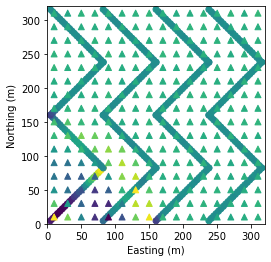

In [25]:
idx = 53
plt.scatter(das_x, das_y,c=edasr[idx])
plt.scatter(xs, ys, marker='^', c=uxr[idx])
plt.xlim(0,320)
plt.ylim(0,320)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")

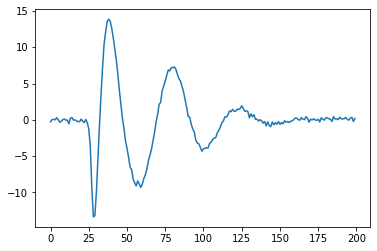

In [26]:
plt.plot(edasr[:,10])

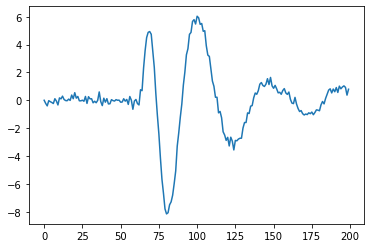

In [27]:
plt.plot(uxr[:,10])

In [28]:
import pywt
wvt = 'db12'
das_wvt_data = np.array([np.hstack(pywt.wavedec(d, wvt)) for d in edasr.T])
nodal_wvt_data_x = np.array([np.hstack(pywt.wavedec(d, wvt)) for d in uxr.T])
nodal_wvt_data_y = np.array([np.hstack(pywt.wavedec(d, wvt)) for d in uyr.T])

In [29]:
np.save("Testing/das_wvt_data.npy", das_wvt_data)
np.save("Testing/nodal_wvt_data_x.npy", nodal_wvt_data_x)
np.save("Testing/nodal_wvt_data_y.npy", nodal_wvt_data_y)
np.save("Testing/nfactor.npy", nfactor)

In [30]:
B = [4, 8, 16, 32, 64, 128, 256]
n_repeats = 10
res = np.zeros((len(B), n_repeats))
ures = np.zeros((len(B), n_repeats))

In [31]:
G = np.vstack([np.hstack([G1, G2]), np.hstack([G3, np.zeros(np.shape(G3))]), np.hstack([np.zeros(np.shape(G3)), G3])])

Gn = np.std(G)

G /= Gn

G3n = G3 / Gn

In [32]:
def reconstruction(w, wvt_lens, wvt):
    starts = np.hstack([0,np.cumsum(wvt_lens)])
    wcoef = [w[starts[i]:starts[i+1]] for i in range(len(wvt_lens))]
    return pywt.waverec(wcoef, wvt)

In [33]:
wvt_tmp = pywt.wavedec(edasr.T[0], wvt)
wvt_lens = [len(wc) for wc in wvt_tmp]

In [61]:
for i, Bi in enumerate(B):
    for j in range(n_repeats):
        if Bi == 256:
            resi = np.load(f"Testing/LassoOutput/32B_{Bi}_run_1.npy")
            uresi = np.load(f"Testing/LassoOutput/32B_{Bi}_urun_1.npy")        
        else:
            resi = np.load(f"Testing/LassoOutput/32B_{Bi}_run_{j+1}.npy")
            uresi = np.load(f"Testing/LassoOutput/32B_{Bi}_urun_{j+1}.npy")
        
        resxi = resi[:G3.shape[1], :]
        resyi = resi[G3.shape[1]:, :]
        uresxi = uresi[:G3.shape[1], :]
        uresyi = uresi[G3.shape[1]:, :]
        
        xpredi = G3n @ resxi
        ypredi = G3n @ resyi
        uxpredi = G3n @ uresxi
        uypredi = G3n @ uresyi
        
        txpredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in xpredi]))
        typredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in ypredi]))
        tuxpredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in uxpredi]))
        tuypredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in uypredi]))
        
        res[i,j] = np.sqrt(np.mean(np.hstack([np.square(txpredi-cuxr.T)/np.std(cuxr, axis=0)[:,np.newaxis]**2, np.square(typredi-cuyr.T)/np.std(cuyr, axis=0)[:,np.newaxis]**2])))#/np.std(np.hstack([cuxr, cuyr]))
        ures[i,j] = np.sqrt(np.mean(np.hstack([np.square(tuxpredi-cuxr.T)/np.std(cuxr, axis=0)[:,np.newaxis]**2, np.square(tuypredi-cuyr.T)/np.std(cuyr, axis=0)[:,np.newaxis]**2])))#/np.std(np.hstack([cuxr, cuyr]))


Text(0, 0.5, 'RMSE')

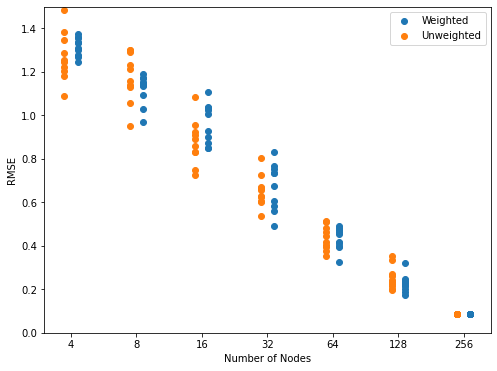

In [63]:
idx = np.array([[i for j in range(n_repeats)] for i, Bi in enumerate(B)])
dx = 0.1
plt.figure(figsize=(8,6))
plt.scatter(idx+dx, res, label="Weighted")
plt.scatter(idx-dx, ures, label="Unweighted")
plt.legend(loc="upper right")
plt.xticks(ticks=[i for i, Bi in enumerate(B)], labels=B)
plt.ylim((0.0,1.5))
plt.xlabel("Number of Nodes")
plt.ylabel("RMSE")

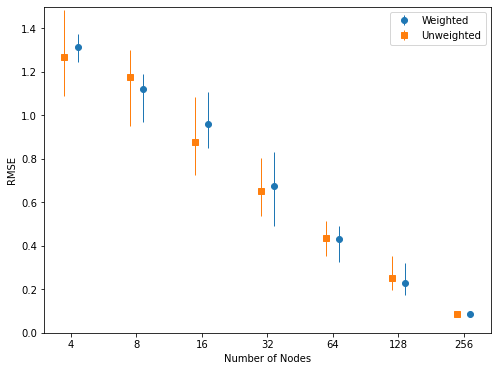

In [64]:
idx = np.array([i for i, Bi in enumerate(B)])
dx = 0.1
plt.figure(figsize=(8,6))
plt.errorbar(idx+dx, np.mean(res, axis=1), yerr=np.abs(np.mean(res, axis=1)-np.array([np.min(res,axis=1), np.max(res,axis=1)])), label="Weighted", marker="o", lw=0, elinewidth=1)
plt.errorbar(idx-dx,  np.mean(ures, axis=1),yerr=np.abs(np.mean(ures, axis=1)-np.array([np.min(ures,axis=1), np.max(ures,axis=1)])), label="Unweighted", marker="s", lw=0, elinewidth=1)
plt.legend(loc="upper right")
plt.xticks(ticks=[i for i, Bi in enumerate(B)], labels=B)
plt.ylim((0.0,1.5))
plt.xlabel("Number of Nodes")
plt.ylabel("RMSE")
plt.savefig("OED_Outcome.pdf")

In [37]:
j = 5
Bi = 32

resi = np.load(f"Testing/LassoOutput/32B_{Bi}_run_{j+1}.npy")
uresi = np.load(f"Testing/LassoOutput/32B_{Bi}_urun_{j+1}.npy")

resxi = resi[:G3.shape[1], :]
resyi = resi[G3.shape[1]:, :]
uresxi = uresi[:G3.shape[1], :]
uresyi = uresi[G3.shape[1]:, :]

xpredi = G3n @ resxi
ypredi = G3n @ resyi
uxpredi = G3n @ uresxi
uypredi = G3n @ uresyi

txpredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in xpredi]))
typredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in ypredi]))
tuxpredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in uxpredi]))
tuypredi = np.real(np.array([reconstruction(w, wvt_lens, wvt) for w in uypredi]))

res[i,j] = np.sqrt(np.mean(np.hstack([np.square(txpredi-cuxr.T), np.square(typredi-cuyr.T)])))/np.std(np.hstack([cuxr, cuyr]))
ures[i,j] = np.sqrt(np.mean(np.hstack([np.square(tuxpredi-cuxr.T), np.square(tuypredi-cuyr.T)])))/np.std(np.hstack([cuxr, cuyr]))

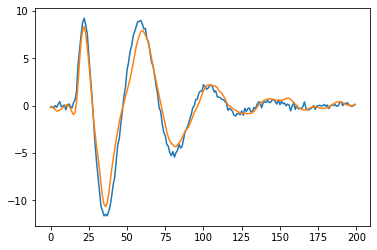

In [38]:
plt.plot(uxr.T[0])
plt.plot(txpredi[0])

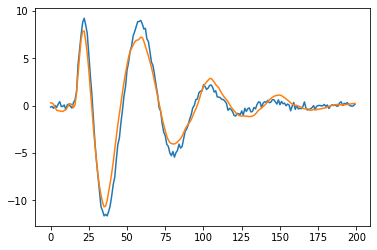

In [39]:
plt.plot(uxr.T[0])
plt.plot(tuxpredi[0])

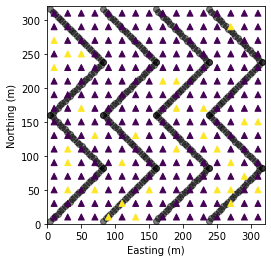

In [40]:
residx = np.load(f"Testing/LassoOutput/32B_{Bi}_run_{j+1}_sensors.npy")
svec = np.zeros(256)
svec[residx-1] = 1
plt.scatter(das_x, das_y,color='k', alpha=0.5)
plt.scatter(xs, ys, marker='^', c=svec)
plt.xlim(0,320)
plt.ylim(0,320)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")

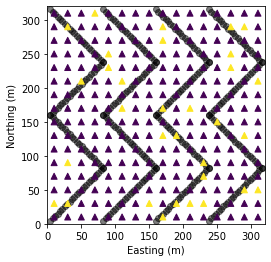

In [41]:
residx = np.load(f"Testing/LassoOutput/32B_{Bi}_urun_{j+1}_sensors.npy")
svec = np.zeros(256)
svec[residx-1] = 1
plt.scatter(das_x, das_y,color='k', alpha=0.5)
plt.scatter(xs, ys, marker='^', c=svec)
plt.xlim(0,320)
plt.ylim(0,320)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.gca().set_aspect("equal")

In [42]:
np.sum(svec)

32.0

In [43]:
idx = 150
d = np.hstack([edasr[idx], uxr[idx], uyr[idx]])

In [44]:
m = np.linalg.solve(G.T @ G, G.T @ d)

In [45]:
mx = np.linalg.solve(G3n.T @ G3n, G3n.T @ uxr[idx])

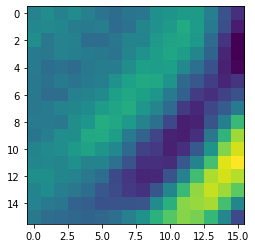

In [46]:
plt.imshow(np.reshape(uxr[idx], (16,16)))

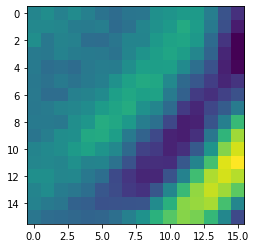

In [47]:
plt.imshow(np.reshape(G3n@m[:G3n.shape[1]], (16,16)))

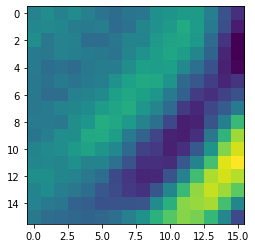

In [48]:
plt.imshow(np.reshape(G3n@mx, (16,16)))

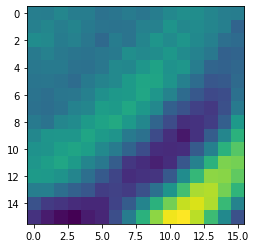

In [49]:
plt.imshow(np.reshape(uyr[idx], (16,16)))

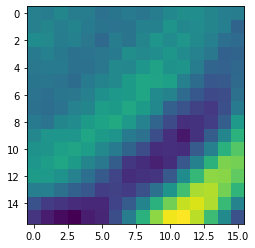

In [50]:
plt.imshow(np.reshape(G3n@m[G3n.shape[1]:], (16,16)))

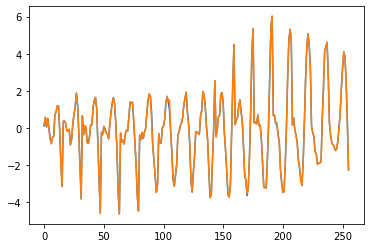

In [51]:
plt.plot(uxr[idx])
plt.plot(G3n@m[:G3n.shape[1]])